# DIAMOND PRICE PREDITION

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### Feature Description

* `price` price in US dollars ($326--$18,823)This is the target column containing tags for the features. 

**The 4 Cs of Diamonds:**

* `carat (0.2--5.01)` The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

* `cut (Fair, Good, Very Good, Premium, Ideal)` In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

* `color, from J (worst) to D (best)` The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

* `clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))` Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

`Dimensions`

`x length in mm (0--10.74)`

`y width in mm (0--58.9)`

`z depth in mm (0--31.8)`

### Data Ingestion

In [3]:
df = pd.read_csv("gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.shape

(193573, 11)

### Data Preprocessing

Steps involved in Data Preprocessing

- Data cleaning
- Identifying and removing outliers
- Encoding categorical variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
# No missing values present in data

In [8]:
## Drop the "id" column as it is not providing any useful information to us
df = df.drop(labels="id", axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [10]:
# Checking Duplicates
df.duplicated().sum()

0

`Points to notice:`

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [11]:
## Dropping Dimensionless Diamonds
data = df.drop(labels=df[df["x"] == 0].index)
data = df.drop(labels=df[df["y"] == 0].index)
data = df.drop(labels=df[df["z"] == 0].index)

data.shape

(193563, 10)

We lost 10 data points by deleting the dimensionless(2-D or 1-D) diamonds.

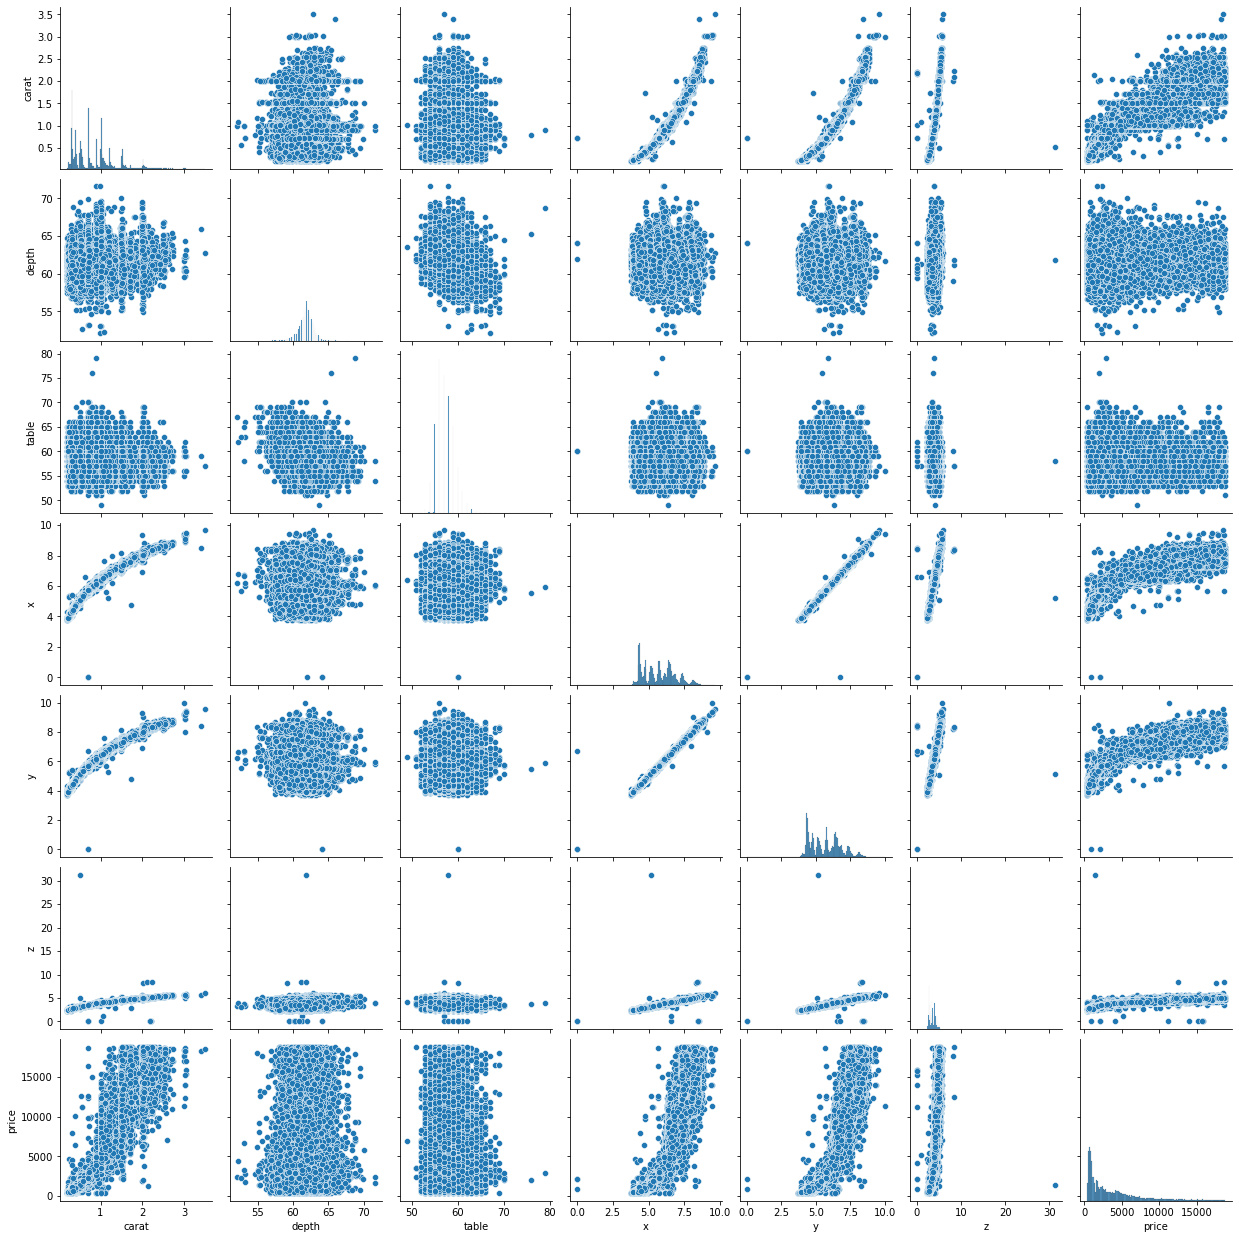

In [12]:
sns.pairplot(df)

A few points to notice in these pair plots

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

* "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.

Let's have a look at regression plots to get a close look at the outliers.

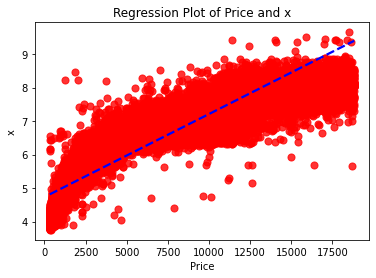

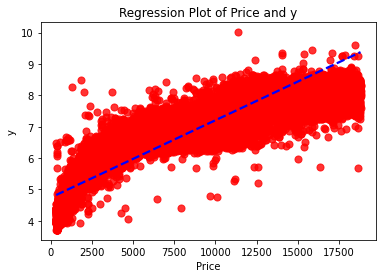

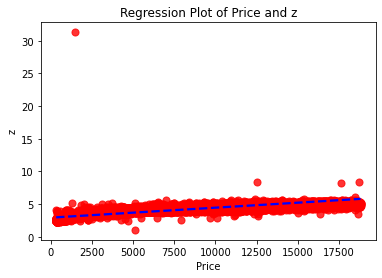

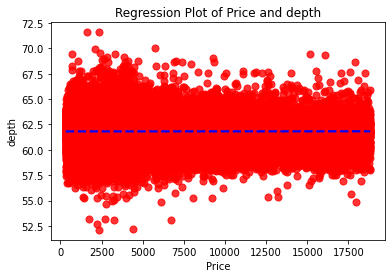

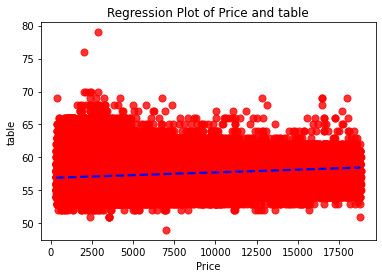

In [13]:
plot_list = ['x','y','z','depth','table']

for i in plot_list:
        sns.regplot(x='price', y=i, data=data, color='red', line_kws={'linestyle':'--','color':'blue'}, scatter_kws={'s':50})
        plt.title('Regression Plot of Price and {}'.format(i))
        plt.xlabel('Price')
        plt.ylabel(i)
        plt.show()

We can clearly spot outliers in these attributes. Next up, we will remove these data points.

In [14]:
# Dropping Outliers
data = data[data['x'] > 2]
data = data[data['y'] < 9]
data = data[(data['z'] > 2) & (data['z'] < 6)]
data = data[(data['depth'] < 70.0) & (data['depth'] > 54)]
data = data[(data['table'] < 73) & (data['table'] > 50)]

data.shape

(193530, 10)

Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

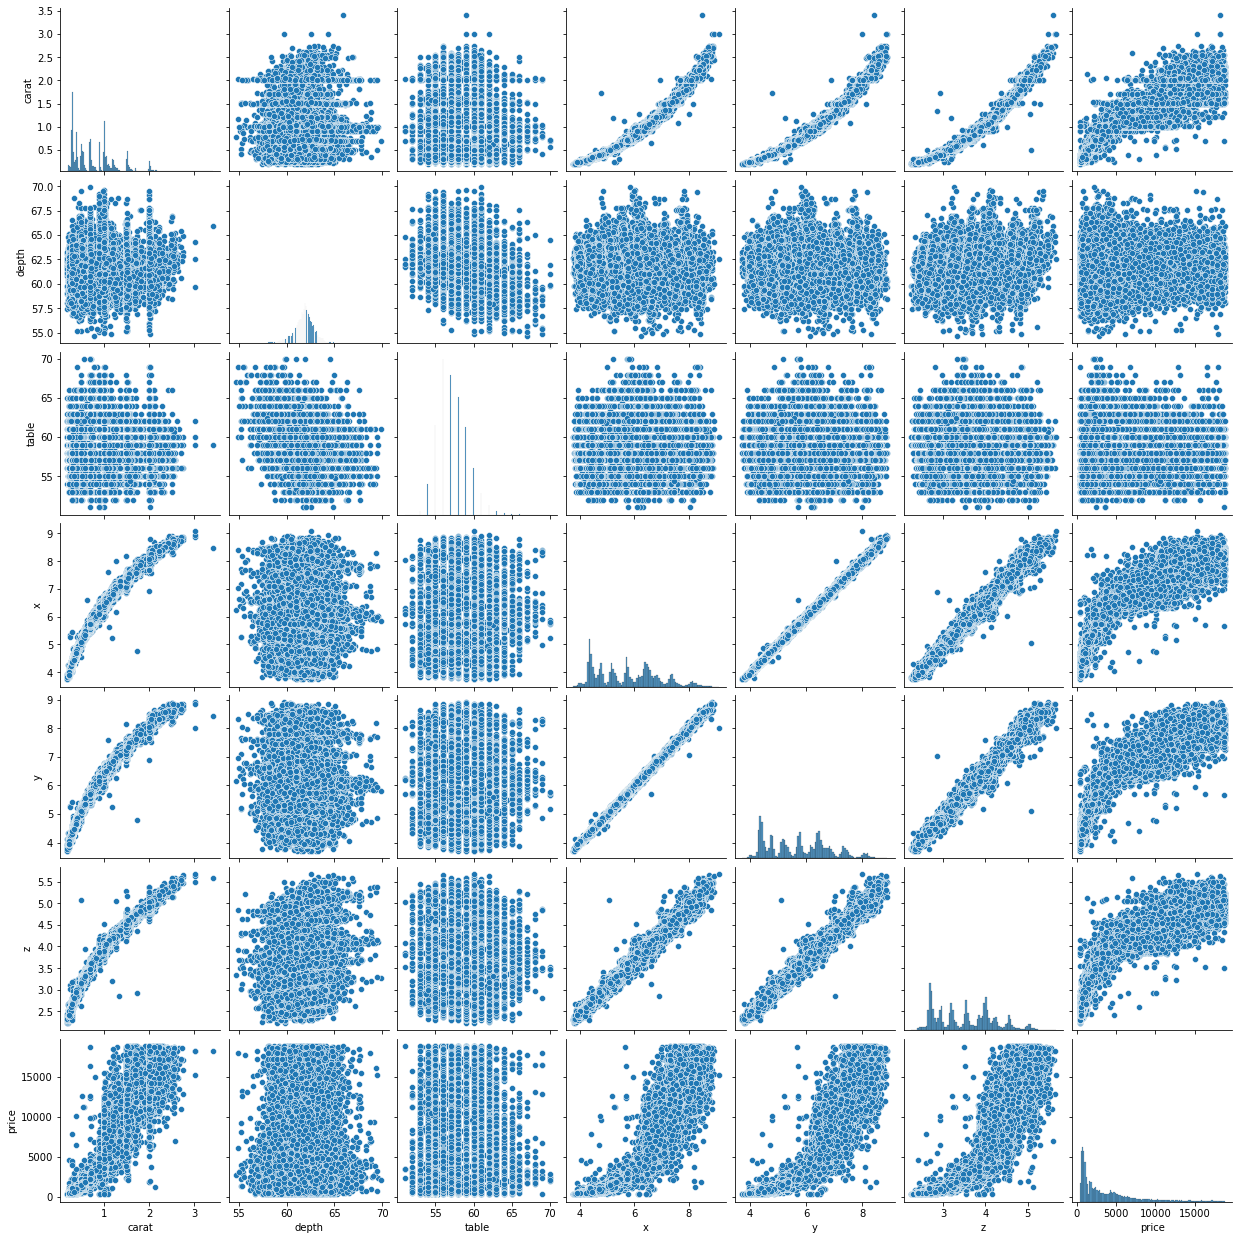

In [15]:
sns.pairplot(data)

That's a much cleaner dataset. Next, we will deal with the categorical variables.

In [16]:
## Segregate Numerical and Categorical Data
categorical_columns = data.columns[df.dtypes == "object"]
numerical_columns = data.columns[df.dtypes != "object"]

print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")

Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')
Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


We have three categorical variables. Let us have a look at them.

In [17]:
data[categorical_columns].describe().transpose()

,count,unique,top,freq
cut,193530,5,Ideal,92451
color,193530,7,G,44386
clarity,193530,8,SI1,53267


In [18]:
data[numerical_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,193530.0,0.790450,0.462250,0.20,0.40,0.70,1.03,3.40
depth,193530.0,61.820763,1.079525,54.70,61.30,61.90,62.40,69.90
table,193530.0,57.227074,1.917179,51.00,56.00,57.00,58.00,70.00
x,193530.0,5.714955,1.108689,3.75,4.70,5.70,6.51,9.10
y,193530.0,5.719710,1.101677,3.71,4.71,5.72,6.51,8.90
z,193530.0,3.534052,0.685100,2.24,2.90,3.53,4.03,5.67
price,193530.0,3967.769209,4032.566041,326.00,950.00,2401.00,5407.00,18818.00


In [19]:
# Cut column
data.cut.value_counts()

Ideal        92451
Premium      49891
Very Good    37563
Good         11617
Fair          2008
Name: cut, dtype: int64

In [20]:
# Color columns
data.color.value_counts()

G    44386
E    35864
F    34250
H    30791
D    24283
I    17503
J     6453
Name: color, dtype: int64

In [21]:
# Clarity column
data.clarity.value_counts()

SI1     53267
VS2     48018
VS1     30667
SI2     30463
VVS2    15762
VVS1    10628
IF       4219
I1        506
Name: clarity, dtype: int64

### Data Visualization

Violin Plots for Categorical Variables

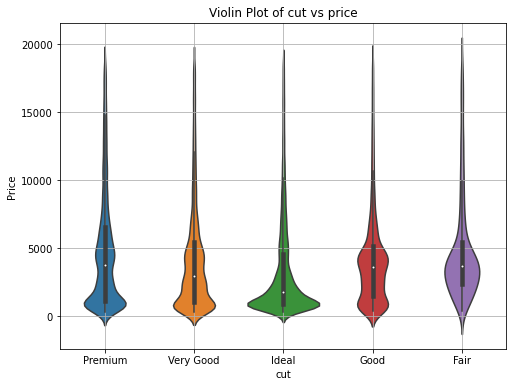

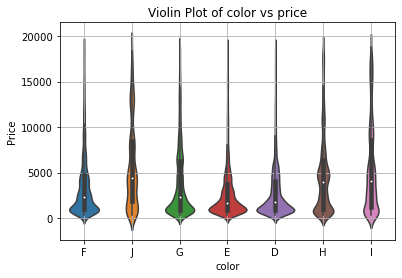

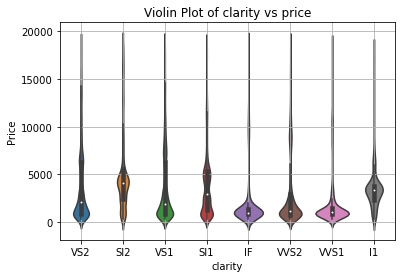

In [22]:
plt.figure(figsize=(8,6))

x = 0
for i in categorical_columns:
    sns.violinplot(data=data, x=i, y='price')
    plt.title(f"Violin Plot of {i} vs price")
    plt.xlabel(i)
    plt.ylabel("Price")
    print('\n')
    plt.grid()
    plt.show()

Hist Plots for Numerical Variables

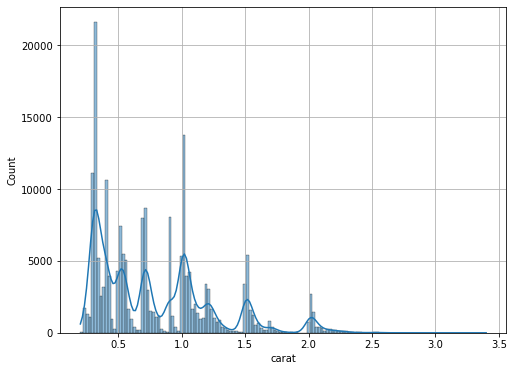

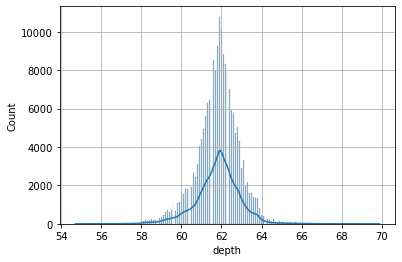

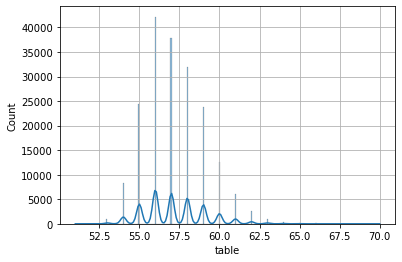

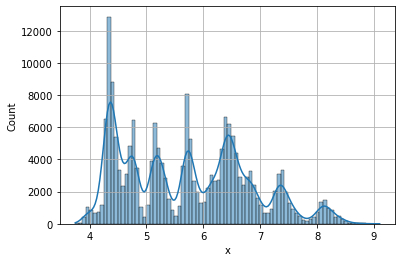

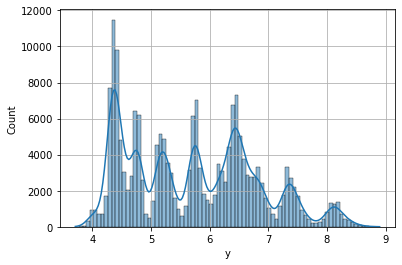

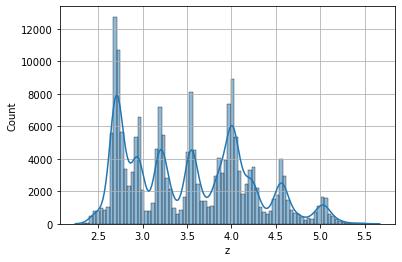

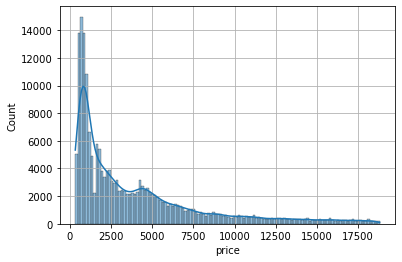

In [23]:
plt.figure(figsize = (8, 6))
for i in numerical_columns:
    sns.histplot(data=data, x=i, kde=True)
    plt.grid()
    print('\n')
    plt.show()

Hist Plots for Categorical Variables

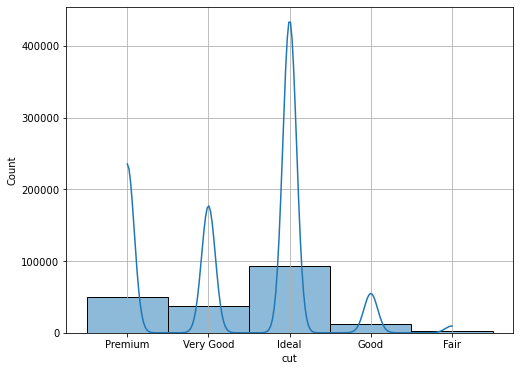

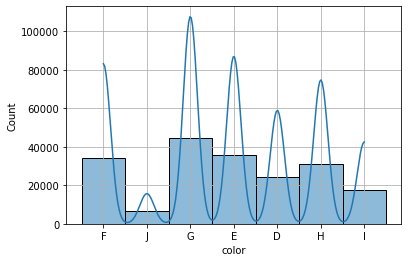

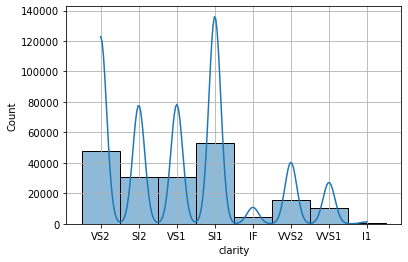

In [24]:
plt.figure(figsize = (8, 6))
for i in categorical_columns:
    sns.histplot(data=data, x=i, kde=True)
    plt.grid()
    print("\n")
    plt.show()

*Label encoding the data to get rid of object dtype.*

In [25]:
# Make copy to avoid changing original data
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

for col in categorical_columns:
    label_data[col] = label_encoder.fit_transform(label_data[col])

label_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453


In [26]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,193530.0,0.790450,0.462250,0.20,0.40,0.70,1.03,3.40
depth,193530.0,61.820763,1.079525,54.70,61.30,61.90,62.40,69.90
table,193530.0,57.227074,1.917179,51.00,56.00,57.00,58.00,70.00
x,193530.0,5.714955,1.108689,3.75,4.70,5.70,6.51,9.10
y,193530.0,5.719710,1.101677,3.71,4.71,5.72,6.51,8.90
z,193530.0,3.534052,0.685100,2.24,2.90,3.53,4.03,5.67
price,193530.0,3967.769209,4032.566041,326.00,950.00,2401.00,5407.00,18818.00


### Correlation Matrix

<AxesSubplot:>

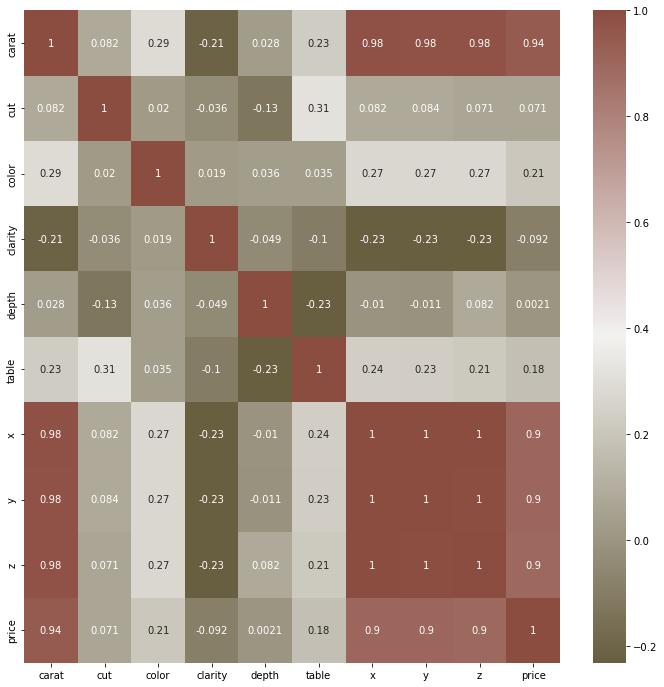

In [27]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

Points to notice:

- "x", "y" and "z" show a high correlation to the target column.
- "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.

### Model Building

Steps involved in Model Building

- Setting up features and target
- Build a pipeline of standard scalar and model for five different regressors.
- Fit all the models on training data
- Get mean of cross-validation on the training set for all the models for negative root mean square error
- Pick the model with the best cross-validation score
- Fit the best model on the training set

In [28]:
label_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453


In [29]:
# Assigning the features as X and target as y
X = label_data.drop('price', axis=1)
y = label_data.price

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

### Pipeline

In [30]:
# Building pipelines of "StandardScaler" and "Models" for various regressors

pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                        ("lr_regressor", LinearRegression())])

pipeline_dt = Pipeline([("scalar2", StandardScaler()),
                        ("dt_regressor", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("scaler3", StandardScaler()),
                        ("rf_regressor", RandomForestRegressor())])

pipeline_kn = Pipeline([("scaler4", StandardScaler()),
                        ("kn_regressor", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scaler5", StandardScaler()),
                        ("xgb_regressor", XGBRegressor())])

# List of all pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression",
             1: "DecisionTree",
             2: "RandomForest",
             3: "KNeighbours",
             4: "XGBoost"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [31]:
cv_results_rms = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(estimator=model,
                               X = X_train,
                               y = y_train,
                               scoring= "neg_root_mean_squared_error",
                               cv = 10)
    cv_results_rms.append(cv_score)
    print(f"{pipe_dict[i]}: {cv_score.mean()}")

LinearRegression: -1101.979322922757
DecisionTree: -836.3569951558787
RandomForest: -612.8542417528492
KNeighbours: -707.1496239649247
XGBoost: -588.3831466759125


**Testing the Model with the best score on the test set**

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

## Model Prediction

In [32]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

## Model Evaluation

In [33]:
# Model Evaluation
print(f"R^2: {metrics.r2_score(y_test, pred)}")
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9786987276532126
Adjusted R^2: 0.9786947644619464
MAE: 301.8531935397569
MSE: 347681.0842340305
RMSE: 589.644879765805
